Classify the email using the binary classification method. Email Spam detection has two states:

1.   Normal State – Not Spam
2.   Abnormal State – Spam

Use K-Nearest Neighbors and Support Vector Machine for classification. Analyze their performance.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/sahil-gidwani/ML/main/dataset/emails.csv')
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4294,Email 4295,57,24,28,21,22,5,212,4,15,...,0,0,0,0,0,0,0,0,0,0
4295,Email 4296,21,9,15,3,8,3,88,2,8,...,0,0,0,0,0,0,0,0,0,0
4296,Email 4297,8,16,7,6,1,0,97,1,1,...,0,0,0,0,0,0,0,2,0,0
4297,Email 4298,1,0,1,1,1,0,3,0,1,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(4299, 3002)

In [4]:
df.isnull().any()

Email No.     False
the           False
to            False
ect           False
and           False
              ...  
military      False
allowing      False
ff            False
dry           False
Prediction    False
Length: 3002, dtype: bool

In [5]:
df.drop(columns = 'Email No.', inplace = True)
df

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4294,57,24,28,21,22,5,212,4,15,24,...,0,0,0,0,0,0,0,0,0,0
4295,21,9,15,3,8,3,88,2,8,23,...,0,0,0,0,0,0,0,0,0,0
4296,8,16,7,6,1,0,97,1,1,18,...,0,0,0,0,0,0,0,2,0,0
4297,1,0,1,1,1,0,3,0,1,3,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df.columns

Index(['the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'in',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3001)

In [7]:
df.Prediction.unique()

array([0, 1])

In [8]:
df['Prediction'] = df['Prediction'].replace({0 : 'Not spam', 1 : 'Spam'})
df

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,Not spam
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,Not spam
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,Not spam
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,Not spam
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,Not spam
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4294,57,24,28,21,22,5,212,4,15,24,...,0,0,0,0,0,0,0,0,0,Not spam
4295,21,9,15,3,8,3,88,2,8,23,...,0,0,0,0,0,0,0,0,0,Not spam
4296,8,16,7,6,1,0,97,1,1,18,...,0,0,0,0,0,0,0,2,0,Not spam
4297,1,0,1,1,1,0,3,0,1,3,...,0,0,0,0,0,0,0,0,0,Not spam


In [9]:
X = df.drop(columns = 'Prediction', axis = 1)
Y = df['Prediction']

In [10]:
X.columns

Index(['the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou', 'in',
       ...
       'enhancements', 'connevey', 'jay', 'valued', 'lay', 'infrastructure',
       'military', 'allowing', 'ff', 'dry'],
      dtype='object', length=3000)

In [11]:
Y.head()

0    Not spam
1    Not spam
2    Not spam
3    Not spam
4    Not spam
Name: Prediction, dtype: object

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

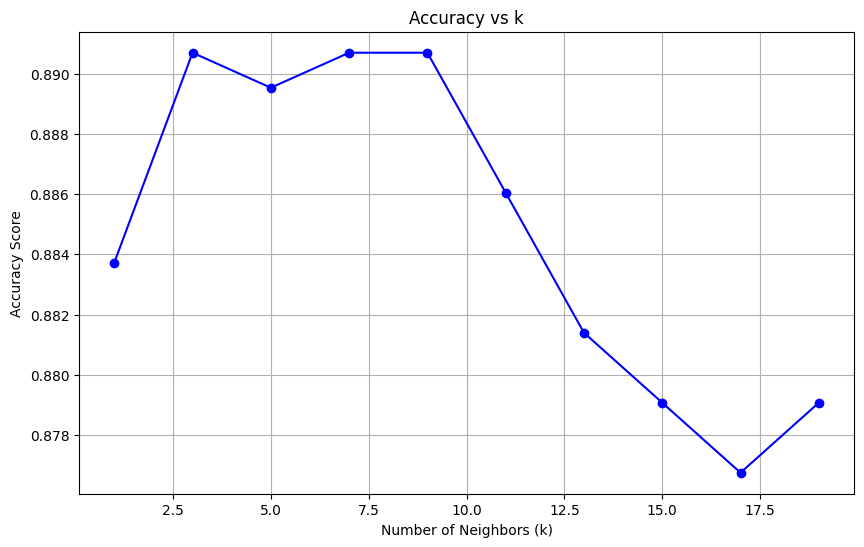

In [13]:
# KNN
k_values = []
accuracy_scores = []

best_k = None
best_accuracy = 0.0

# Choose an odd number to avoid tie situations
for k in range(1, 21, 2):  # You can adjust the range based on your preferences
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    k_values.append(k)
    accuracy_scores.append(accuracy)

    # Check if the current k results in a higher accuracy
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs k')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.show()

In [14]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

print(f"Best k: {best_k}")

Best k: 3


In [15]:
print("Prediction:")
print(y_pred)

Prediction:
['Spam' 'Not spam' 'Spam' 'Spam' 'Spam' 'Not spam' 'Not spam' 'Spam'
 'Not spam' 'Spam' 'Not spam' 'Spam' 'Not spam' 'Not spam' 'Spam'
 'Not spam' 'Not spam' 'Not spam' 'Not spam' 'Spam' 'Not spam' 'Not spam'
 'Not spam' 'Not spam' 'Spam' 'Not spam' 'Spam' 'Not spam' 'Not spam'
 'Not spam' 'Not spam' 'Not spam' 'Spam' 'Not spam' 'Not spam' 'Not spam'
 'Spam' 'Not spam' 'Not spam' 'Not spam' 'Not spam' 'Spam' 'Not spam'
 'Spam' 'Not spam' 'Not spam' 'Not spam' 'Not spam' 'Spam' 'Not spam'
 'Not spam' 'Not spam' 'Not spam' 'Not spam' 'Not spam' 'Not spam'
 'Not spam' 'Not spam' 'Not spam' 'Not spam' 'Not spam' 'Not spam'
 'Not spam' 'Not spam' 'Not spam' 'Not spam' 'Not spam' 'Not spam'
 'Not spam' 'Spam' 'Spam' 'Not spam' 'Not spam' 'Not spam' 'Not spam'
 'Not spam' 'Not spam' 'Spam' 'Not spam' 'Not spam' 'Not spam' 'Not spam'
 'Not spam' 'Not spam' 'Not spam' 'Not spam' 'Not spam' 'Spam' 'Spam'
 'Not spam' 'Not spam' 'Spam' 'Not spam' 'Not spam' 'Spam' 'Not spam'
 'Spam' 'S

In [16]:
M = metrics.accuracy_score(y_test, y_pred)
print("KNN accuracy: ", M)

KNN accuracy:  0.8906976744186047


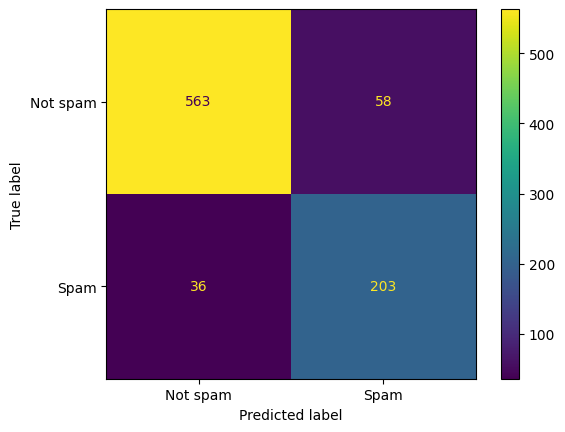

In [17]:
C = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=C, display_labels=knn.classes_)
disp.plot()

In [18]:
# SVM Classifier
model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

In [19]:
print("Prediction:")
print(y_pred)

Prediction:
['Not spam' 'Not spam' 'Not spam' 'Spam' 'Spam' 'Not spam' 'Not spam'
 'Spam' 'Not spam' 'Not spam' 'Not spam' 'Not spam' 'Not spam' 'Not spam'
 'Not spam' 'Not spam' 'Not spam' 'Not spam' 'Not spam' 'Not spam'
 'Not spam' 'Spam' 'Not spam' 'Not spam' 'Not spam' 'Not spam' 'Spam'
 'Not spam' 'Not spam' 'Not spam' 'Not spam' 'Not spam' 'Not spam'
 'Not spam' 'Not spam' 'Not spam' 'Not spam' 'Not spam' 'Not spam'
 'Not spam' 'Not spam' 'Spam' 'Not spam' 'Not spam' 'Not spam' 'Not spam'
 'Not spam' 'Not spam' 'Not spam' 'Not spam' 'Not spam' 'Not spam'
 'Not spam' 'Not spam' 'Not spam' 'Not spam' 'Not spam' 'Not spam'
 'Not spam' 'Not spam' 'Not spam' 'Not spam' 'Not spam' 'Not spam'
 'Not spam' 'Not spam' 'Not spam' 'Not spam' 'Not spam' 'Spam' 'Not spam'
 'Not spam' 'Not spam' 'Not spam' 'Not spam' 'Not spam' 'Not spam'
 'Not spam' 'Not spam' 'Not spam' 'Not spam' 'Not spam' 'Not spam'
 'Not spam' 'Not spam' 'Not spam' 'Not spam' 'Spam' 'Spam' 'Not spam'
 'Not spam' 'Spam' '

In [20]:
kc = metrics.accuracy_score(y_test, y_pred)
print("SVM accuracy: ", kc)

SVM accuracy:  0.8046511627906977


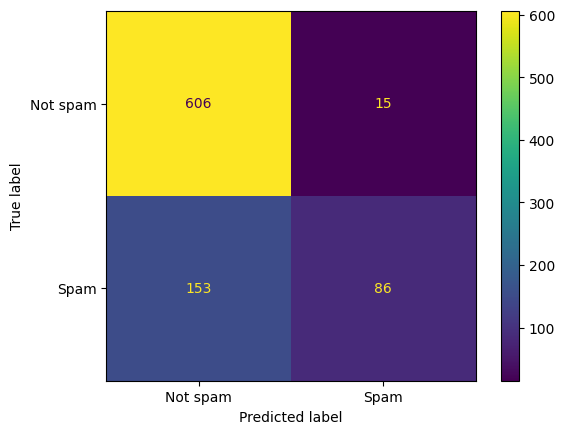

In [21]:
C = metrics.confusion_matrix(y_test, y_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=C, display_labels=model.classes_)
disp.plot()

In [22]:
# [[TN  FP]
#  [FN  TP]]

# # Example confusion matrix
# C = metrics.confusion_matrix(y_test, y_pred)

# # Extract TP, TN, FP, FN
# TN = C[0, 0]  # True Negatives
# FP = C[0, 1]  # False Positives
# FN = C[1, 0]  # False Negatives
# TP = C[1, 1]  # True Positives

# # Calculate accuracy
# accuracy = (TP + TN) / (TP + TN + FP + FN)

# # Calculate precision
# precision = TP / (TP + FP)

# # Calculate recall
# recall = TP / (TP + FN)

# # Calculate specificity (True Negative Rate)
# specificity = TN / (TN + FP)

# # Calculate F1-Score
# f1_score = 2 * (precision * recall) / (precision + recall)

# # Calculate False Positive Rate
# fpr = FP / (FP + TN)

# # Calculate False Negative Rate
# fnr = FN / (FN + TP)

# # Print the calculated metrics
# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("Specificity:", specificity)
# print("F1-Score:", f1_score)
# print("False Positive Rate:", fpr)
# print("False Negative Rate:", fnr)